In [2]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential


In [3]:
## load the dataset
Heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
Heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,45.0,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
1,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
2,42.0,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
3,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
4,69.0,0,582,0,20,0,266000.00,1.20,134,1,1,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,53.0,1,1808,0,60,1,249000.00,0.70,138,1,1,106,0
295,53.0,1,446,0,60,1,263358.03,1.00,139,1,0,215,0
296,45.0,0,308,1,60,1,377000.00,1.00,136,1,0,186,0
297,50.0,0,582,0,62,1,147000.00,0.80,140,1,1,192,0


In [4]:
Heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
Heart.drop_duplicates()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,45.0,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
1,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
2,42.0,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
3,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
4,69.0,0,582,0,20,0,266000.00,1.20,134,1,1,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,53.0,1,1808,0,60,1,249000.00,0.70,138,1,1,106,0
295,53.0,1,446,0,60,1,263358.03,1.00,139,1,0,215,0
296,45.0,0,308,1,60,1,377000.00,1.00,136,1,0,186,0
297,50.0,0,582,0,62,1,147000.00,0.80,140,1,1,192,0


## The dataset is clean, there is no Blank and No Duplicated items

In [6]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = Heart.corr(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
corr_mat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.10,0.06,0.09,-0.05,0.16,-0.05,0.07,0.02,-0.22,0.25
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.04,-0.04,0.05,0.04,-0.09,-0.11,-0.14,0.07
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.02,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.10,-0.01,-0.01,1.00,-0.00,-0.01,0.09,-0.05,-0.09,-0.16,-0.15,0.03,-0.00
ejection_fraction,0.06,0.03,-0.04,-0.00,1.00,0.02,0.07,-0.01,0.18,-0.15,-0.07,0.04,-0.27
high_blood_pressure,0.09,0.04,-0.07,-0.01,0.02,1.00,0.05,-0.00,0.04,-0.10,-0.06,-0.20,0.08
platelets,-0.05,-0.04,0.02,0.09,0.07,0.05,1.00,-0.04,0.06,-0.13,0.03,0.01,-0.05
serum_creatinine,0.16,0.05,-0.02,-0.05,-0.01,-0.00,-0.04,1.00,-0.19,0.01,-0.03,-0.15,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.19,1.00,-0.03,0.00,0.09,-0.20
sex,0.07,-0.09,0.08,-0.16,-0.15,-0.10,-0.13,0.01,-0.03,1.00,0.45,-0.02,-0.00


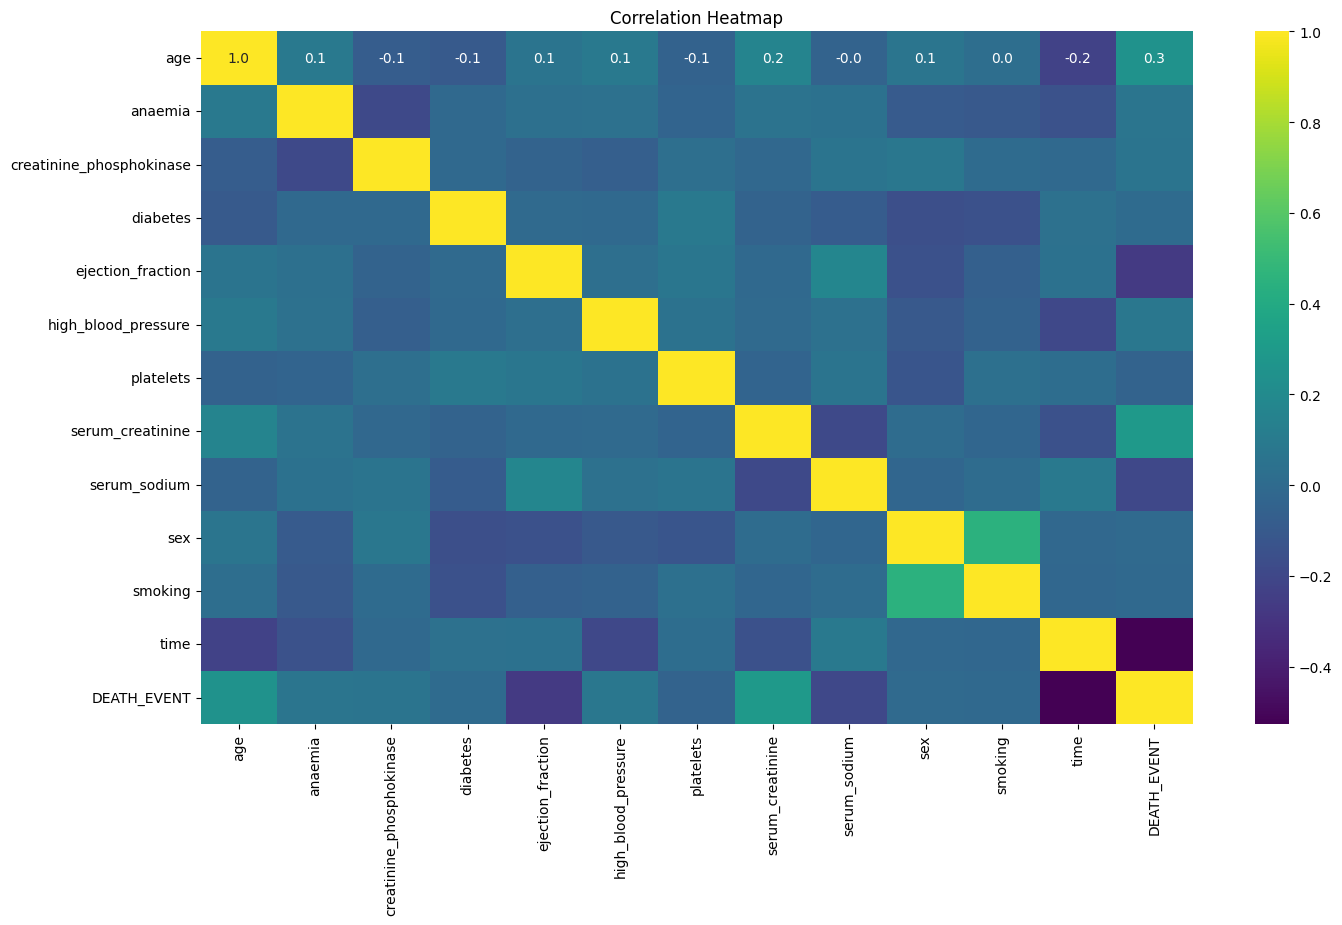

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(corr_mat, annot=True, cmap="viridis", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
##Describing  Heart data, find mean, median,std, Min, Max, LQ,Median, UQ in 2 decimal place 

pd.options.display.float_format = '{:.2f}'.format
Heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


~~~Observing the heatmap, we can identify certain features that exhibit notable correlations. For instance, Age and Serum Creatinine exhibit a positive correlation, while Ejection Fraction, Serum Sodium, and Time display a negative correlation.

%%% Observing the heatmap, we can identify certain features that exhibit notable correlations. For instance, Age and Serum Creatinine exhibit a positive correlation, while Ejection Fraction, Serum Sodium, and Time display a negative correlation.

## Choosing Line graph between AGE and Survival


In [9]:
## Creat variables
x = Heart.iloc[:, 0:12]
y = Heart.iloc[:, 12]

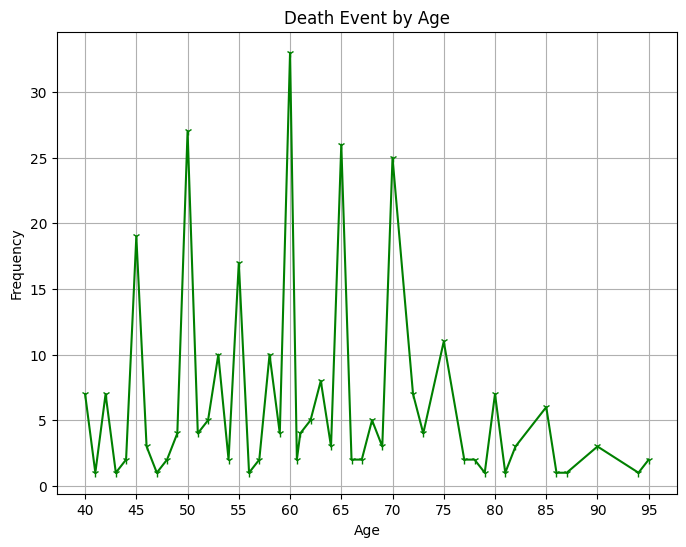

In [10]:
# Exploring Frequency o by Age
age = Heart['age'].value_counts().sort_index()

# Line chart to visualize of survival by Age
plt.figure(figsize=(8, 6))
plt.plot(age.index, age.values, marker='1', linestyle='-', color='green')
plt.title('Death Event by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(int(min(age.index)), int(max(age.index)) + 1, 5), rotation=0)
plt.xticks(rotation=0)
plt.grid(True)  # Add grid lines for better readability
plt.show()

&&in the above graph there are a lot of noise, therefore I need to use scaling to normalize it, .
//I use scikit-learn's MinMaxScaler to normalize the "age" values so that they are in the range [0, 1].

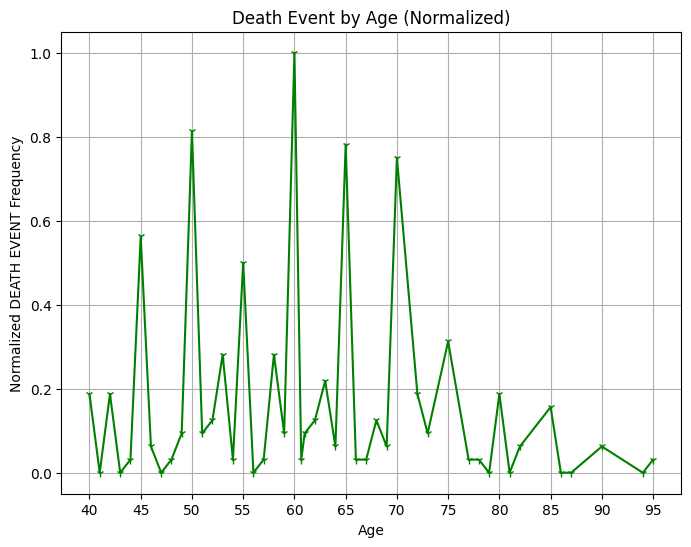

In [11]:
# Line chart to visualize of survival by Age
# Exploring Frequency o by Age
age = Heart['age'].value_counts().sort_index()##The 'age' values are extracted from the 'Heart' DataFrame, and the frequency of each age is counted and sorted.

# First I Normalize the frequency values (survival)
scaler = MinMaxScaler()
normalized_survival = scaler.fit_transform(age.values.reshape(-1,1))##The 'age' values are then normalized using the Min-Max Scaler to obtain 'normalized_survival' values.
plt.figure(figsize=(8, 6))
plt.plot(age.index, normalized_survival, marker='1', linestyle='-', color='green')

plt.title('Death Event by Age (Normalized)')
# Add grid lines for better readability,to have the grids in smaller partitions of 5
plt.xticks(range(int(min(age.index)), int(max(age.index)) + 1, 5), rotation=0)
plt.xlabel('Age')
plt.ylabel('Normalized DEATH EVENT Frequency')

plt.grid(True)
plt.xticks(rotation=0) 
plt.show()

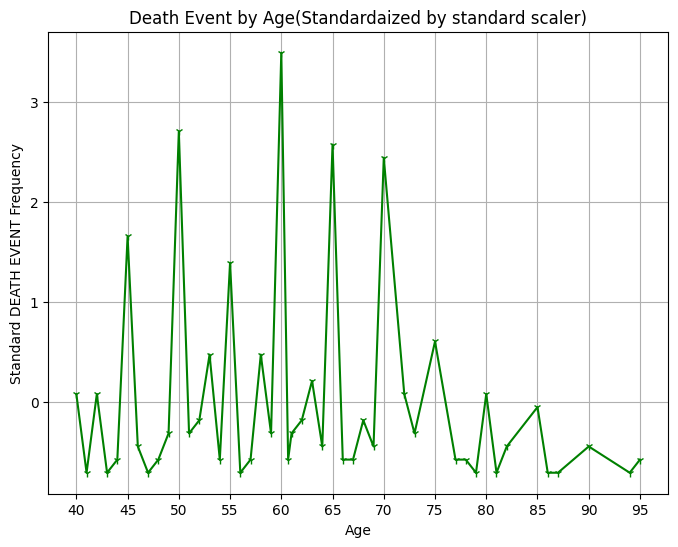

In [12]:
## creeat the code for age and frequency of survival (Age by survival)
age = Heart['age'].value_counts().sort_index()
Survival = Heart['DEATH_EVENT']

## scaling using standard scaler
scaler = StandardScaler()
age_scaled= scaler.fit_transform(age.values.reshape(-1,1))
DEATH_EVENT_scaled = scaler.fit_transform(Survival.values.reshape(-1, 1))

# Line chart to visualize of survival by Age
plt.figure(figsize=(8, 6))
plt.plot(age.index, age_scaled, marker='1', linestyle='-', color='green')
plt.title('Death Event by Age(Standardaized by standard scaler)')
plt.xlabel('Age')
plt.ylabel('Standard DEATH EVENT Frequency')
# Set the grid in x-axis ticks with an interval of 5, for better observation
plt.xticks(range(int(min(age.index)), int(max(age.index)) + 1, 5), rotation=0)

plt.xticks(rotation=0)
plt.grid(True)  # Add grid lines for better readability
plt.show()

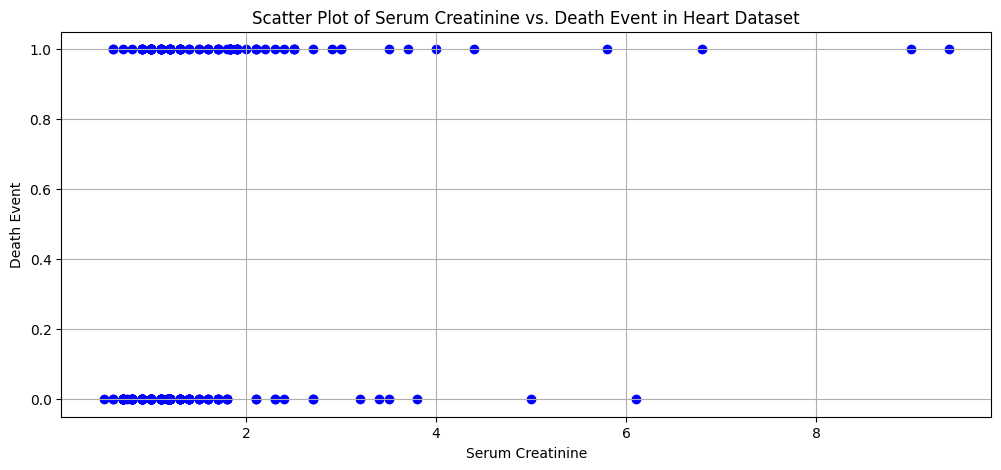

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))

# Scatter Plot
ax.scatter(Heart['serum_creatinine'], Heart['DEATH_EVENT'], c='blue')
ax.set_xlabel('Serum Creatinine')
ax.set_ylabel('Death Event')  # Adjusted y-axis label
ax.set_title('Scatter Plot of Serum Creatinine vs. Death Event in Heart Dataset')  # Improved title
plt.grid(True)  # Add grid lines for better readability

plt.show()


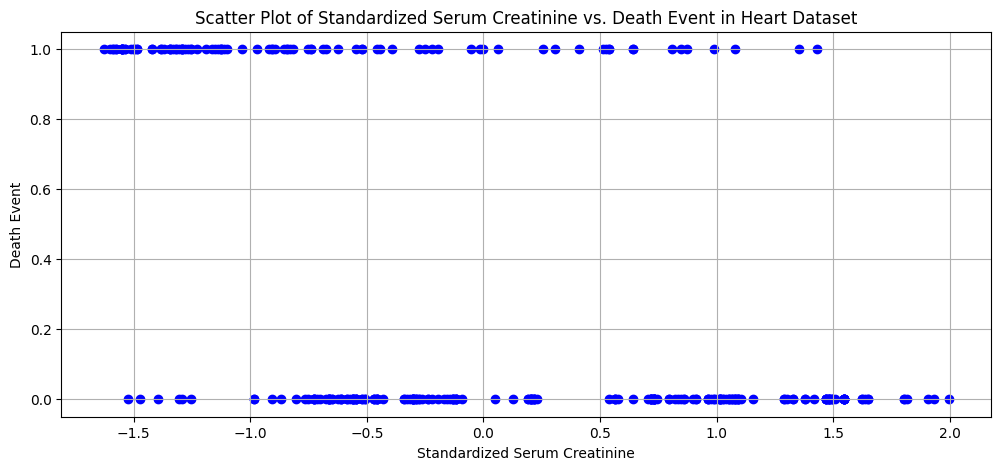

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract and standardize 'Serum_Creatinine'
time = Heart['time']
Survival = Heart['DEATH_EVENT']

scaler = StandardScaler()
time_scaled = scaler.fit_transform(time.values.reshape(-1, 1))
DEATH_EVENT_scaled = scaler.fit_transform(Survival.values.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(12, 5))

# Scatter Plot
ax.scatter(time_scaled, Heart['DEATH_EVENT'], c='blue')
ax.set_xlabel('Standardized Serum Creatinine')
ax.set_ylabel('Death Event')
ax.set_title('Scatter Plot of Standardized Serum Creatinine vs. Death Event in Heart Dataset')
plt.grid(True)  # Add grid lines for better readability

plt.show()


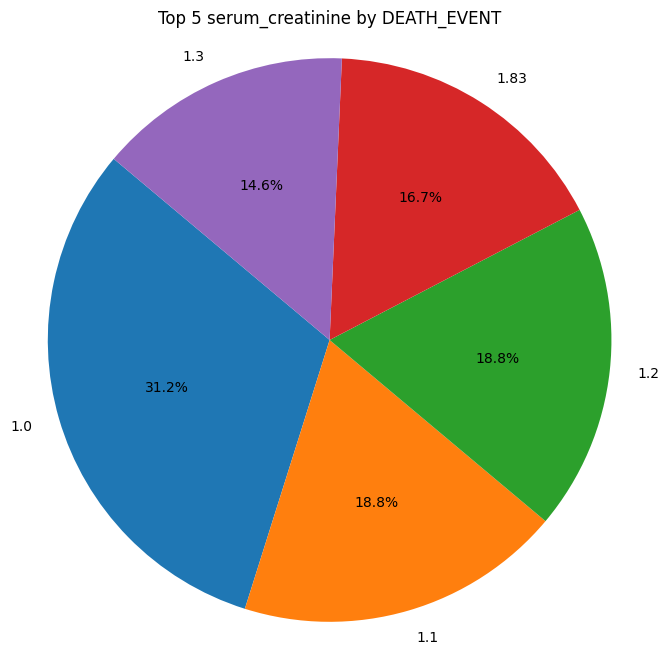

In [15]:

# Group by 'serum_creatinine', sum the 'mag' values, and select the top 5serum_creatinine by DEATH _EVENT
top_5_serum_creatinine = Heart.groupby('serum_creatinine')['DEATH_EVENT'].sum().nlargest(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_serum_creatinine, labels=top_5_serum_creatinine.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 serum_creatinine by DEATH_EVENT')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

In [16]:
## Selecting the testing data for the model
x = Heart.iloc[:, 0:12]
y = Heart.iloc[:, 12]

## Standard scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = scaler.transform(x)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
## Creating and fitting the model
log_reg = LogisticRegression()
log_reg.fit(x ,y)
## Making predictions
y_pred_logreg = log_reg.predict(x)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


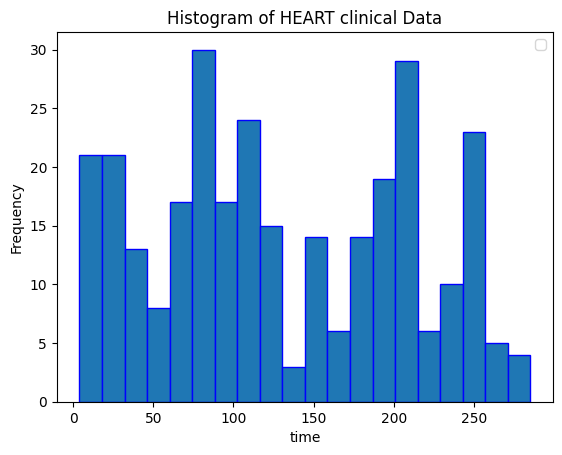

In [ ]:
## We use the 'time' column from the Heart dataset to create a histogram that displays / 
# Assessing the distribution of time (follow up) in relation to the occurrences of deaths.
#the frequency distribution of 'time' values. 
##time indeed is follow up time in clinical records
# Create a histogram of 'time' value
plt.hist(Heart['time'], bins=20, edgecolor='b')

plt.title('Histogram of HEART clinical Data')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.legend()

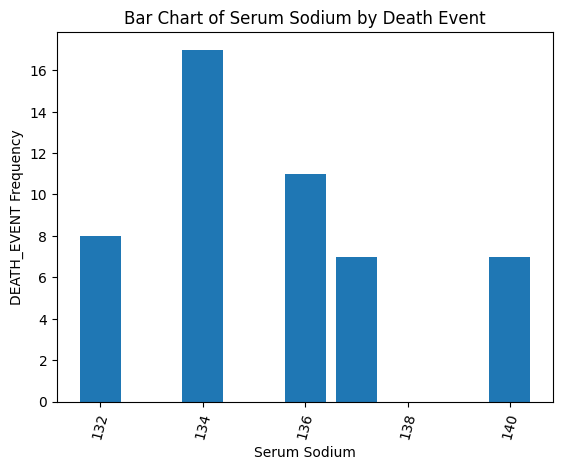

In [ ]:
# Group by 'serum_sodium', sum 'DEATH_EVENT', and select the top 5 serum_sodium values ---Here I want to see if I group them
serum_sodium_data = Heart.groupby('serum_sodium')['DEATH_EVENT'].sum().nlargest(5)

# Create a bar chart
plt.bar(serum_sodium_data.index, serum_sodium_data.values)
plt.title('Bar Chart of Serum Sodium by Death Event')
plt.xlabel('Serum Sodium')
plt.ylabel('DEATH_EVENT Frequency')
plt.xticks(rotation=75)
plt.show()

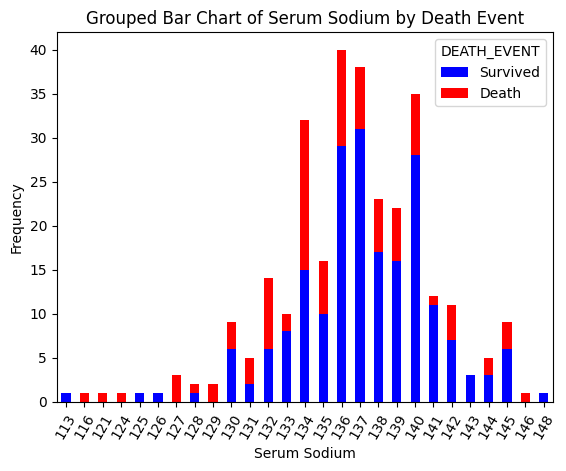

In [ ]:
## Making group of the data by both 'serum_sodium' and 'DEATH_EVENT' and count the occurrences.
##The serum_sodium_data DataFrame contains the counts of 'DEATH_EVENT' for each 'serum_sodium' value.
## Creating a grouped bar chart using .plot(kind='bar', stacked=True).
# Group by 'serum_sodium' and 'DEATH_EVENT', and count occurrences

serum_sodium_data = Heart.groupby(['serum_sodium', 'DEATH_EVENT']).size().unstack()

# Define custom colors for survived and death bars
colors = ['blue', 'red']

# Create a grouped bar chart
serum_sodium_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Grouped Bar Chart of Serum Sodium by Death Event')
plt.xlabel('Serum Sodium')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.legend(title='DEATH_EVENT', labels=['Survived', 'Death'])
plt.show()
